# Kaggel Survey

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('kaggle_survey_2021_responses.csv')

C:\Users\Mama\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: DtypeWarning: Columns (0,195,201,285,286,287,288,289,290,291,292) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### Descover Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25974 entries, 0 to 25973
Columns: 369 entries, Time from Start to Finish (seconds) to Q38_B_OTHER
dtypes: object(369)
memory usage: 73.1+ MB


In [4]:
df.shape

(25974, 369)

### Cleaning Data

In [90]:
questions = df.iloc[0,:]
questions

Time from Start to Finish (seconds)                  910
Q1                                                 50-54
Q2                                                   Man
Q3                                                 India
Q4                                     Bachelor’s degree
                                             ...        
Q38_B_Part_8                                         NaN
Q38_B_Part_9                                         NaN
Q38_B_Part_10                                        NaN
Q38_B_Part_11                                        NaN
Q38_B_OTHER                                          NaN
Name: 1, Length: 369, dtype: object

In [6]:
df.drop(index=0 ,inplace = True)

In [7]:
df

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
5,781,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25969,1756,30-34,Man,Egypt,Bachelor’s degree,Data Analyst,1-3 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25970,253,22-24,Man,China,Master’s degree,Student,1-3 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25971,494,50-54,Man,Sweden,Doctoral degree,Research Scientist,I have never written code,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
25972,277,45-49,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
for col in df.columns :
    if df[col].str.isnumeric().all():
        df[col] = pd.to_numeric(df[col])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25973 entries, 1 to 25973
Columns: 369 entries, Time from Start to Finish (seconds) to Q38_B_OTHER
dtypes: float64(8), int64(1), object(360)
memory usage: 73.3+ MB


##### Top 5 countries participated in the survey

In [38]:
df['Q3'].value_counts(sort=True)[0:6]

India                       7434
United States of America    2650
Other                       1270
Japan                        921
China                        814
Brazil                       751
Name: Q3, dtype: int64

In [45]:
top5='India' , 'United States of America ',' Japan ', 'China' , 'Brazil'
top5

('India', 'United States of America ', ' Japan ', 'China', 'Brazil')

In [49]:
df_top5=df[df['Q3'].isin(top5)]

In [50]:
df_top5.shape

(8999, 369)

## 1- Gender distribution

In [67]:
gender=df_top5['Q2'].value_counts()

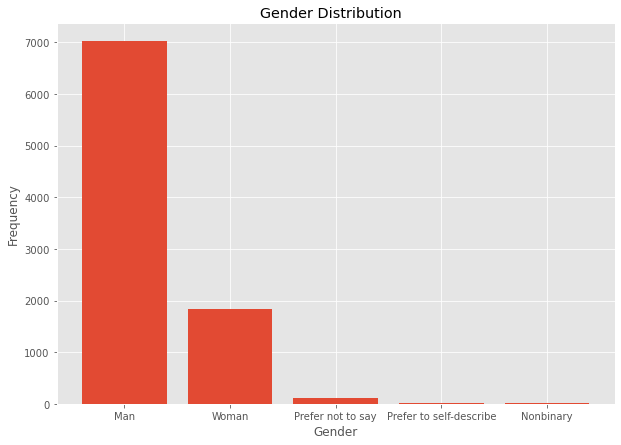

In [78]:
plt.style.use('ggplot')
plt.figure(figsize=(10,7))
plt.bar(gender.index,gender.values)
plt.title('Gender Distribution  ')
plt.xlabel('Gender')
plt.ylabel('Frequency');

## 2-The Age Distribution

In [72]:
age=df_top5['Q1'].value_counts().sort_index()

In [73]:
x=age.index
y=age.values

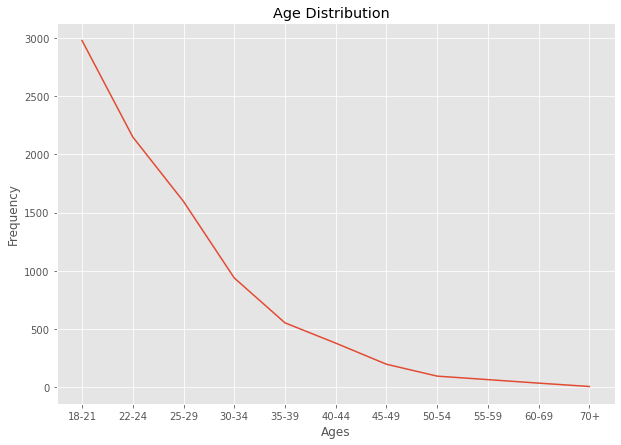

In [74]:
plt.style.use('ggplot')
plt.figure(figsize=(10,7))

plt.plot(x , y)

plt.title('Age Distribution  ')
plt.xlabel('Ages')
plt.ylabel('Frequency');

## 3- Programming Language Distribution

In [79]:
lang_col=df_top5.columns[df_top5.columns.str.contains('^Q7')]
df_top5[lang_col]


,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER
1,Python,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Python,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,MATLAB,NaN,NaN
6,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,C++,Java,Javascript,NaN,NaN,NaN,NaN,NaN,NaN
8,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25963,Python,NaN,NaN,C,C++,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25966,Python,NaN,SQL,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25967,Python,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25970,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
dic = dict()
for col in lang_col:
    key=df_top5[col].value_counts().index[0]
    dic[key]=df_top5[col].value_counts()[0]
    
dic   
    

{'Python': 7827,
 'R': 1503,
 'SQL': 3729,
 'C': 2473,
 'C++': 2534,
 'Java': 2044,
 'Javascript': 1425,
 'Julia': 69,
 'Swift': 43,
 'Bash': 445,
 'MATLAB': 1017,
 'None': 67,
 'Other': 574}

In [81]:
dic=pd.Series(dic)

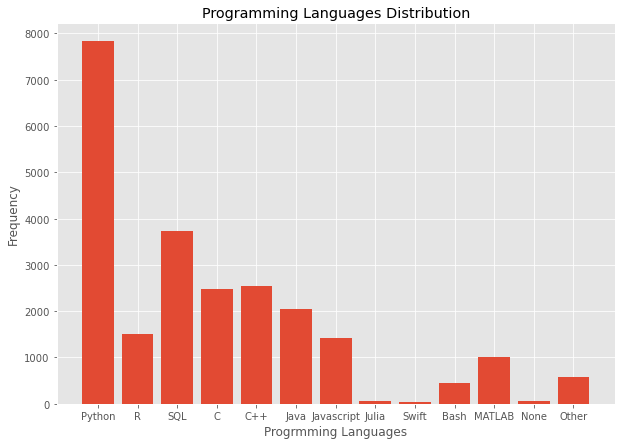

In [82]:
plt.style.use('ggplot')
plt.figure(figsize=(10,7))
plt.bar(dic.index , dic.values)
plt.title('Programming Languages Distribution')
plt.xlabel('Progrmming Languages')
plt.ylabel('Frequency');

### 4- Jobs Distribution

In [104]:
jobs=df_top5['Q5'].value_counts()[0:5]

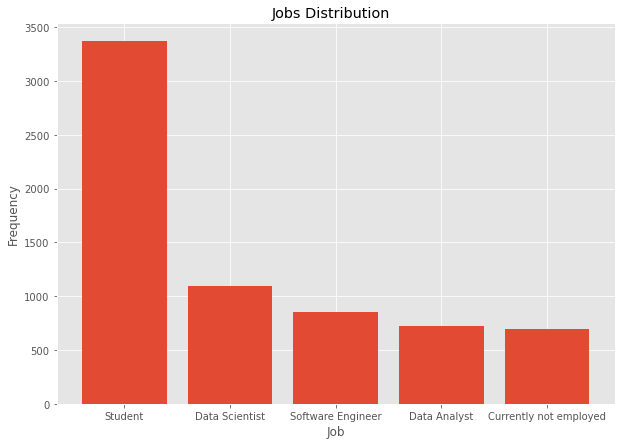

In [105]:
plt.style.use('ggplot')
plt.figure(figsize=(10,7))
plt.bar(jobs.index,jobs.values)
plt.title('Jobs Distribution  ')
plt.xlabel('Job')
plt.ylabel('Frequency');